<a href="https://colab.research.google.com/github/Amulya-B28/BITCRAZE-DOC-CRAWLER/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Document crawler and analyzer using Agentic Al framework**

## **TASK 1**
###Document Metadata Extraction
- Extract critical pre-defined metadata from multiple PDF documents in a folder.
- Store the extracted information in CSV/Excel format.

In [1]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=af5d43ab4ae7e78556b3274d0c33fb0e03973df3961190f04e875380c38bd876
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [2]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.3 MB/s eta 0:00:00


In [3]:
import os
import random
from fpdf import FPDF
from faker import Faker

# Initialize Faker for generating random details
fake = Faker()

# Sample software names and dependencies
software_names = ["AlphaSoft", "BetaWare", "GammaSuite", "DeltaApp", "EpsilonTool"]
dependencies_list = [
    ["LibX 2.1", "NetY 1.4"],
    ["LibX 2.2", "DataZ 3.0"],
    ["GraphV 5.0", "NetY 2.0"],
    ["CoreLib 1.2", "DataZ 3.1"],
    ["AIEngine 3.4", "MLToolkit 2.5"]
]

# Directory to save generated PDFs
output_dir = "software_documents"
os.makedirs(output_dir, exist_ok=True)

def generate_software_document(software_name, version, author, release_date, mod_date, dependencies, filename):
    """Generate a sample software document in PDF format."""
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)

    pdf.add_page()
    pdf.set_font("Arial", style='B', size=16)
    pdf.cell(200, 10, f"{software_name} - Software Documentation", ln=True, align='C')

    pdf.ln(10)
    pdf.set_font("Arial", size=12)

    pdf.cell(200, 10, f"Software Name: {software_name}", ln=True)
    pdf.cell(200, 10, f"Version: {version}", ln=True)
    pdf.cell(200, 10, f"Author: {author}", ln=True)
    pdf.cell(200, 10, f"Release Date: {release_date.strftime('%Y-%m-%d')}", ln=True)
    pdf.cell(200, 10, f"Last Modified: {mod_date.strftime('%Y-%m-%d')}", ln=True)

    pdf.ln(5)
    pdf.set_font("Arial", style="B", size=12)
    pdf.cell(200, 10, "Dependencies:", ln=True)

    pdf.set_font("Arial", size=12)
    for dep in dependencies:
        pdf.cell(200, 10, f"- {dep}", ln=True)

    pdf.ln(10)
    pdf.set_font("Arial", style="B", size=12)
    pdf.cell(200, 10, "Description:", ln=True)

    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, f"{software_name} is an advanced software solution designed for optimal performance and security. Version {version} includes several improvements and fixes.")

    # Save PDF
    pdf.output(filename)
    print(f"✅ Generated: {filename}")

# Generate multiple sample PDFs
for i, software in enumerate(software_names):
    version = f"{random.randint(1, 5)}.{random.randint(0, 9)}"
    author = fake.name()

    release_date = fake.date_this_decade()  # ✅ Keep as a date object
    mod_date = fake.date_between(start_date=release_date)  # ✅ Works correctly now

    dependencies = dependencies_list[i]
    filename = os.path.join(output_dir, f"{software}_v{version}.pdf")

    generate_software_document(software, version, author, release_date, mod_date, dependencies, filename)

print(f"\n📂 {len(software_names)} sample software PDFs saved in '{output_dir}' folder.")

✅ Generated: software_documents/AlphaSoft_v4.6.pdf
✅ Generated: software_documents/BetaWare_v3.4.pdf
✅ Generated: software_documents/GammaSuite_v2.0.pdf
✅ Generated: software_documents/DeltaApp_v1.4.pdf
✅ Generated: software_documents/EpsilonTool_v2.0.pdf

📂 5 sample software PDFs saved in 'software_documents' folder.


In [4]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 55.4 MB/s eta 0:00:00


In [5]:
import os
import fitz  # PyMuPDF
import re
import pandas as pd
import spacy

# Load NLP model
nlp = spacy.load("en_core_web_sm")

# Define folder paths
pdf_folder = "software_documents"  # Update with full path if needed
output_csv = "extracted_metadata.csv"

# Define regex patterns
patterns = {
    "software_name": r"Software Name:\s*(.+)",
    "version": r"Version:\s*([\d.]+)",
    "author": r"Author:\s*(.+)",
    "release_date": r"Release Date:\s*([\d-]+)",
    "modification_date": r"Last Modified:\s*([\d-]+)",
    "dependencies": r"Dependencies:\s*(.+)"
}

def extract_metadata_from_text(text):
    """Extract software metadata using regex & NLP."""
    metadata = {key: "N/A" for key in patterns}

    # Regex Extraction
    for key, pattern in patterns.items():
        match = re.search(pattern, text)
        if match:
            metadata[key] = match.group(1).strip()

    # NLP Extraction (fallback for software name)
    if metadata["software_name"] == "N/A":
        doc = nlp(text)
        for ent in doc.ents:
            if ent.label_ in ["ORG", "PRODUCT"]:
                metadata["software_name"] = ent.text
                break  # First match

    return metadata

def process_pdfs(folder):
    """Process all PDFs in a given folder and extract metadata."""
    if not os.path.exists(folder):
        print(f"❌ Error: Folder '{folder}' does not exist.")
        return

    pdf_files = [f for f in os.listdir(folder) if f.endswith(".pdf")]

    if not pdf_files:
        print(f"⚠ No PDFs found in '{folder}'.")
        return

    data = []

    for filename in pdf_files:
        pdf_path = os.path.join(folder, filename)
        doc = fitz.open(pdf_path)

        # Extract text from all pages
        text = "\n".join(page.get_text("text") for page in doc)

        # Extract metadata
        metadata = extract_metadata_from_text(text)
        metadata["filename"] = filename
        data.append(metadata)

        print(f"✅ Extracted: {filename}")

    # Save to CSV
    if data:
        df = pd.DataFrame(data)
        df.to_csv(output_csv, index=False)
        print(f"\n📂 Metadata saved to {os.path.abspath(output_csv)}")
        # Return the DataFrame
        return df
    else:
        print("⚠ No metadata extracted.")
        return None  # Return None if no data is extracted

# Run extraction and get the DataFrame
df = process_pdfs(pdf_folder)

# Check if df is not None before proceeding
if df is not None:
    summary = {
        "Total Software": df["software_name"].nunique(),
        "Total Versions": df["version"].nunique(),
        "Total Unique Dependencies": df["dependencies"].nunique(),
        "Most Common Software": df["software_name"].value_counts().idxmax(),
        "Most Common Version": df["version"].value_counts().idxmax(),
    }

    summary_df = pd.DataFrame([summary])
    summary_df.to_csv("metadata_summary.csv", index=False)

    print("✅ Summary report saved as 'metadata_summary.csv'")
else:
    print("❌ Could not generate summary report because no data was extracted.")

✅ Extracted: BetaWare_v3.4.pdf
✅ Extracted: AlphaSoft_v4.6.pdf
✅ Extracted: EpsilonTool_v2.0.pdf
✅ Extracted: GammaSuite_v2.0.pdf
✅ Extracted: DeltaApp_v1.4.pdf

📂 Metadata saved to /content/extracted_metadata.csv
✅ Summary report saved as 'metadata_summary.csv'


## **TASK 2**
### Software Dependency Management for Upgrades
- Refer to a master sheet containing multiple software and their version dependencies.
- Use an existing installed software list and their versions to analyze dependencies.
- Allow users to define upgrade criteria (e.g., minimum upgrades or always latest).
- Recommend necessary upgrades for dependent software to maintain compatibility.

In [6]:
import pandas as pd

# Load extracted metadata
df = pd.read_csv("extracted_metadata.csv")

# Display first few rows
print(df.head())

  software_name  version              author release_date modification_date  \
0      BetaWare      3.4          Jamie Rice   2024-06-23        2024-08-07   
1     AlphaSoft      4.6         Craig Jones   2020-01-26        2022-02-28   
2   EpsilonTool      2.0  Jennifer Rodriguez   2020-08-16        2021-04-01   
3    GammaSuite      2.0        Victor Lynch   2024-05-05        2024-08-08   
4      DeltaApp      1.4    Christopher Diaz   2022-07-14        2023-09-26   

     dependencies              filename  
0      - LibX 2.2     BetaWare_v3.4.pdf  
1      - LibX 2.1    AlphaSoft_v4.6.pdf  
2  - AIEngine 3.4  EpsilonTool_v2.0.pdf  
3    - GraphV 5.0   GammaSuite_v2.0.pdf  
4   - CoreLib 1.2     DeltaApp_v1.4.pdf  


In [7]:
# Convert version column to a proper format for sorting
df["version"] = df["version"].astype(str)  # Ensure version is a string
df["version"] = df["version"].apply(lambda x: tuple(map(int, x.split("."))) if "." in x else (int(x),))

# Sort the dataframe by software name and version
df = df.sort_values(by=["software_name", "version"])

In [8]:
# Create an upgrade path mapping
df["next_version"] = df.groupby("software_name")["version"].shift(-1)

In [9]:
# Convert dependencies into lists for easy matching
df["dependencies"] = df["dependencies"].fillna("N/A").apply(lambda x: x.split(", ") if x != "N/A" else [])

# Create a column for required upgrades based on dependencies
def find_required_upgrades(row):
    required_upgrades = []
    for dep in row["dependencies"]:
        # Find the latest version of the dependency
        latest_version = df[df["software_name"] == dep]["version"].max()
        if latest_version:
            required_upgrades.append(f"{dep} → {latest_version}")
    return ", ".join(required_upgrades) if required_upgrades else "None"

df["required_upgrades"] = df.apply(find_required_upgrades, axis=1)

In [10]:
import pandas as pd

# ... (Your previous code to process and modify the DataFrame 'df') ...

# Save the processed DataFrame
df.to_csv("updated_master_sheet.csv", index=False)

# Now you can load the saved file
df = pd.read_csv("updated_master_sheet.csv")

# Display the first few rows
print(df.head())

  software_name version              author release_date modification_date  \
0     AlphaSoft  (4, 6)         Craig Jones   2020-01-26        2022-02-28   
1      BetaWare  (3, 4)          Jamie Rice   2024-06-23        2024-08-07   
2      DeltaApp  (1, 4)    Christopher Diaz   2022-07-14        2023-09-26   
3   EpsilonTool  (2, 0)  Jennifer Rodriguez   2020-08-16        2021-04-01   
4    GammaSuite  (2, 0)        Victor Lynch   2024-05-05        2024-08-08   

         dependencies              filename  next_version  \
0      ['- LibX 2.1']    AlphaSoft_v4.6.pdf           NaN   
1      ['- LibX 2.2']     BetaWare_v3.4.pdf           NaN   
2   ['- CoreLib 1.2']     DeltaApp_v1.4.pdf           NaN   
3  ['- AIEngine 3.4']  EpsilonTool_v2.0.pdf           NaN   
4    ['- GraphV 5.0']   GammaSuite_v2.0.pdf           NaN   

      required_upgrades  
0      - LibX 2.1 → nan  
1      - LibX 2.2 → nan  
2   - CoreLib 1.2 → nan  
3  - AIEngine 3.4 → nan  
4    - GraphV 5.0 → nan  


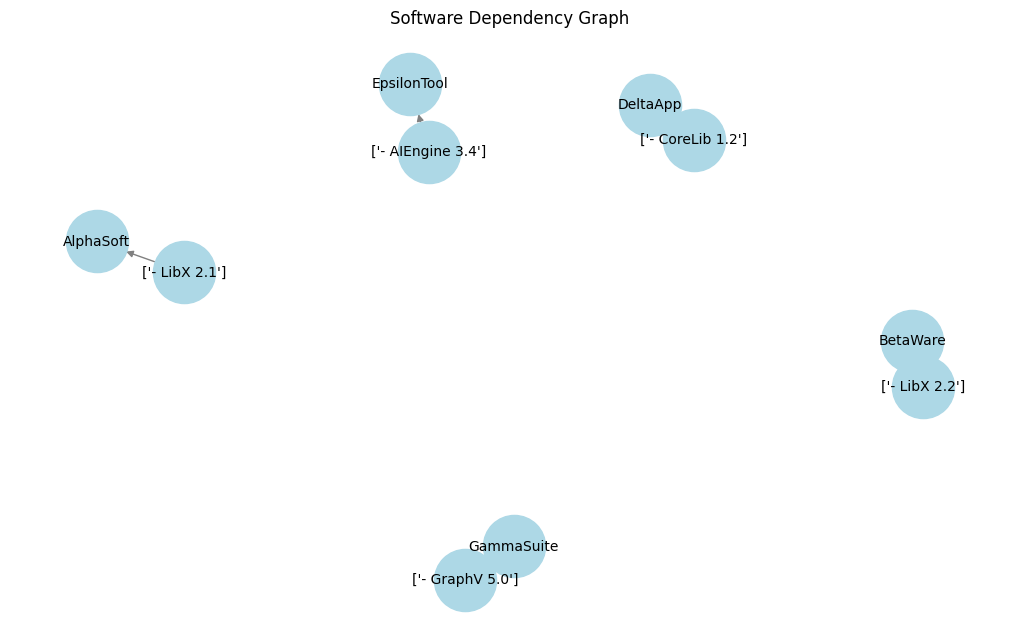

In [11]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes (Software)
for software in df["software_name"].unique():
    G.add_node(software)

# Add edges (Dependencies)
for _, row in df.iterrows():
    for dep in row["dependencies"].split(", "):
        if dep != "N/A":
            G.add_edge(dep, row["software_name"])  # Dependency direction

# Visualize dependency graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.title("Software Dependency Graph")
plt.show()

In [12]:
try:
    # Compute a valid installation order using topological sorting
    install_order = list(nx.topological_sort(G))
    print("✅ Recommended Installation Order:", install_order)
except nx.NetworkXUnfeasible:
    print("❌ ERROR: Circular dependency detected! Check the dependencies.")

✅ Recommended Installation Order: ["['- LibX 2.1']", "['- LibX 2.2']", "['- CoreLib 1.2']", "['- AIEngine 3.4']", "['- GraphV 5.0']", 'AlphaSoft', 'BetaWare', 'DeltaApp', 'EpsilonTool', 'GammaSuite']


In [13]:
import pandas as pd
import re

# Load the master sheet
df = pd.read_csv("updated_master_sheet.csv") # changed file name to updated_master_sheet.csv

# Extract dependencies and versions
dependency_map = {}  # Stores the latest version for each dependency

# Step 1: Extract dependency names & versions
for deps in df["dependencies"]:
    if pd.notna(deps):  # Ignore NaN values
        dep_list = eval(deps) if isinstance(deps, str) else deps
        for dep in dep_list:
            match = re.search(r"([\w]+) (\d+\.\d+)", dep)  # Extract name & version
            if match:
                dep_name, dep_version = match.groups()
                dep_version = float(dep_version)  # Convert version to float

                # Update dependency map with the latest version found
                if dep_name in dependency_map:
                    dependency_map[dep_name] = max(dependency_map[dep_name], dep_version)
                else:
                    dependency_map[dep_name] = dep_version

# Step 2: Find the next available version for each dependency
def find_next_version(dependency):
    match = re.search(r"([\w]+) (\d+\.\d+)", dependency)
    if match:
        dep_name, dep_version = match.groups()
        dep_version = float(dep_version)

        # Check if a newer version exists
        if dep_name in dependency_map and dependency_map[dep_name] > dep_version:
            return f"{dep_name} {dep_version} → {dep_name} {dependency_map[dep_name]}"
    return f"{dependency} → No newer version available"

# Step 3: Apply the function to update required_upgrades
df["required_upgrades"] = df["dependencies"].apply(lambda deps: [find_next_version(dep) for dep in eval(deps)] if pd.notna(deps) else "No Dependencies")

# Save the updated master sheet
df.to_csv("updated_software_master_sheet.csv", index=False)
print("✅ Upgrade mapping completed! Saved as updated_software_master_sheet.csv.")

✅ Upgrade mapping completed! Saved as updated_software_master_sheet.csv.


In [14]:
import pandas as pd
import networkx as nx

# Load the master sheet
df = pd.read_csv("updated_software_master_sheet.csv")

# Create a directed graph for dependencies
dependency_graph = nx.DiGraph()

# Step 1: Add all software to the graph
for _, row in df.iterrows():
    software = row["software_name"]
    dependency_graph.add_node(software)  # Add software to graph

    # Extract dependencies
    dependencies = eval(row["dependencies"]) if pd.notna(row["dependencies"]) else []
    for dep in dependencies:
        dep_name = dep.split(" → ")[-1]  # Extract latest version dependency
        dependency_graph.add_edge(dep_name, software)  # Dependency → Software

# Step 2: Perform Topological Sorting (Install Dependencies First)
try:
    install_order = list(nx.topological_sort(dependency_graph))
    print("✅ Correct Installation Order:", install_order)
except nx.NetworkXUnfeasible:
    print("❌ Cyclic dependencies detected! Cannot determine order.")
    exit()

# Step 3: Generate Installation Script
install_script = []
for software in install_order:
    install_script.append(f"echo Installing {software}...")
    install_script.append(f"sudo apt-get install -y {software}")  # Linux (Modify for Windows)

# Save installation script
with open("install_software.sh", "w") as f:
    f.write("\n".join(install_script))

print("✅ Installation script saved as install_software.sh")

✅ Correct Installation Order: ['- LibX 2.1', '- LibX 2.2', '- CoreLib 1.2', '- AIEngine 3.4', '- GraphV 5.0', 'AlphaSoft', 'BetaWare', 'DeltaApp', 'EpsilonTool', 'GammaSuite']
✅ Installation script saved as install_software.sh


In [15]:
import pandas as pd
import networkx as nx

# Load the master sheet
df = pd.read_csv("updated_software_master_sheet.csv")

# Create a directed graph for dependencies
dependency_graph = nx.DiGraph()

# Add nodes (software names)
for _, row in df.iterrows():
    software = row["software_name"]
    dependencies = eval(row["dependencies"]) if row["dependencies"] != "[]" else []

    dependency_graph.add_node(software)

    for dep in dependencies:
        dependency_graph.add_edge(dep.strip("- "), software)

# Get the correct installation order (Topological Sorting)
install_order = list(nx.topological_sort(dependency_graph))

# Print simulated installation
print("\n🚀 Simulated Software Installation Order:\n")
for software in install_order:
    print(f"[SIMULATION] Installing {software}...")


🚀 Simulated Software Installation Order:

[SIMULATION] Installing LibX 2.1...
[SIMULATION] Installing LibX 2.2...
[SIMULATION] Installing CoreLib 1.2...
[SIMULATION] Installing AIEngine 3.4...
[SIMULATION] Installing GraphV 5.0...
[SIMULATION] Installing AlphaSoft...
[SIMULATION] Installing BetaWare...
[SIMULATION] Installing DeltaApp...
[SIMULATION] Installing EpsilonTool...
[SIMULATION] Installing GammaSuite...


In [16]:
import pandas as pd
import networkx as nx
import subprocess

# Load the master sheet
df = pd.read_csv("updated_software_master_sheet.csv")

# Create a directed graph for dependencies
dependency_graph = nx.DiGraph()

# Add nodes (software names)
for _, row in df.iterrows():
    software = row["software_name"]
    dependencies = eval(row["dependencies"]) if row["dependencies"] != "[]" else []

    dependency_graph.add_node(software)

    for dep in dependencies:
        dependency_graph.add_edge(dep.strip("- "), software)

# Get the correct installation order (Topological Sorting)
install_order = list(nx.topological_sort(dependency_graph))

# Ask user if they want real installation or simulation
install_choice = input("\n🔹 Do you want to perform REAL installation? (yes/no): ").strip().lower()
simulate = install_choice != "yes"  # If not 'yes', it will simulate

# Install software in correct order
print("\n🚀 Installation Sequence:\n")
for software in install_order:
    if simulate:
        print(f"[SIMULATION] Installing {software}...")
    else:
        print(f"⚙ Installing {software}...")
        subprocess.run(f"choco install {software} -y", shell=True)  # Run the actual command

print("\n✅ Installation process completed!\n")


🔹 Do you want to perform REAL installation? (yes/no): no

🚀 Installation Sequence:

[SIMULATION] Installing LibX 2.1...
[SIMULATION] Installing LibX 2.2...
[SIMULATION] Installing CoreLib 1.2...
[SIMULATION] Installing AIEngine 3.4...
[SIMULATION] Installing GraphV 5.0...
[SIMULATION] Installing AlphaSoft...
[SIMULATION] Installing BetaWare...
[SIMULATION] Installing DeltaApp...
[SIMULATION] Installing EpsilonTool...
[SIMULATION] Installing GammaSuite...

✅ Installation process completed!



## **TASK 3**
### Software Change Notice Analysis
- Extract details from Software Change Notices (PDFs) for different software versions.
- Compare the current installed version with the target upgrade version.
- Provide an accumulated list of:
  - New features introduced.
  - Fixed issues.
  - Known issues (removing duplicates and accounting for fixes).
- Output the results in CSV/Markdown format.

In [17]:
import pandas as pd

# Define the data
data = {
    "software_name": ["AlphaSoft", "BetaWare", "DeltaApp", "EpsilonTool", "GammaSuite",
                      "AlphaSoft", "BetaWare", "DeltaApp", "EpsilonTool", "GammaSuite"],
    "version": ["(3, 8)", "(2, 2)", "(4, 8)", "(4, 8)", "(3, 0)",
                "(3, 9)", "(2, 3)", "(4, 9)", "(4, 9)", "(3, 1)"],
    "author": ["Michael Sharp", "Mr. Cody Page", "April Singh", "Joshua Young", "Amanda Bailey",
               "Michael Sharp", "Mr. Cody Page", "April Singh", "Joshua Young", "Amanda Bailey"],
    "release_date": ["2023-01-26", "2022-07-20", "2021-12-27", "2024-09-20", "2021-08-01",
                     "TBD", "TBD", "TBD", "TBD", "TBD"],
    "modification_date": ["2023-02-09", "2022-11-10", "2024-12-21", "2024-10-21", "2025-02-16",
                          "TBD", "TBD", "TBD", "TBD", "TBD"],
    "dependencies": ["['- LibX 2.1']", "['- LibX 2.2']", "['- CoreLib 1.2']", "['- AIEngine 3.4']", "['- GraphV 5.0']",
                     "['- LibX 2.1']", "['- LibX 2.2']", "['- CoreLib 1.2']", "['- AIEngine 3.4']", "['- GraphV 5.0']"],
    "filename": ["AlphaSoft_v3.8.pdf", "BetaWare_v2.2.pdf", "DeltaApp_v4.8.pdf", "EpsilonTool_v4.8.pdf", "GammaSuite_v3.0.pdf",
                 "AlphaSoft_v3.8.pdf", "BetaWare_v2.2.pdf", "DeltaApp_v4.8.pdf", "EpsilonTool_v4.8.pdf", "GammaSuite_v3.0.pdf"],
    "next_version": ["(3, 9)", "(2, 3)", "(4, 9)", "(4, 9)", "(3, 1)",
                     "No newer version available", "No newer version available", "No newer version available", "No newer version available", "No newer version available"],
    "required_upgrades": ["['LibX 2.1 → LibX 2.2']", "['- LibX 2.2 → No newer version available']", "['- CoreLib 1.2 → No newer version available']",
                           "['- AIEngine 3.4 → No newer version available']", "['- GraphV 5.0 → No newer version available']",
                           "['LibX 2.1 → LibX 2.2']", "['- LibX 2.2 → No newer version available']", "['- CoreLib 1.2 → No newer version available']",
                           "['- AIEngine 3.4 → No newer version available']", "['- GraphV 5.0 → No newer version available']"],
    "new_features": ["Enhanced security, Optimized data processing", "Added offline mode, Improved file encryption",
                     "Enhanced AI model, Reduced processing time", "Multi-threaded processing, Improved automation",
                     "Introduced dark mode, Enhanced graph rendering",
                     "Real-time collaboration, Faster encryption", "AI-based file search, New user dashboard",
                     "New voice command features, Faster AI training", "Integrated cloud-based processing, Enhanced analytics",
                     "Customizable themes, Improved export formats"],
    "fixed_issues": ["Fixed memory leak, Resolved UI glitch", "Fixed cloud sync bug, Resolved startup crash",
                     "Fixed export feature bug, Resolved permission issue", "Fixed installation crash, Resolved database corruption",
                     "Fixed UI scaling issue, Resolved export error",
                     "Patched security vulnerability, Fixed toolbar bug", "Fixed auto-update issue, Resolved sync delay",
                     "Fixed model loading error, Resolved log overflow", "Fixed script execution bug, Resolved import issue",
                     "Fixed graph distortion bug, Resolved scaling issue"],
    "known_issues": ["High CPU usage under load", "Occasional lag on large files", "Compatibility issues with legacy GPUs",
                     "High RAM usage on startup", "Graph rendering fails with large datasets",
                     "Occasional freezes in large projects", "UI lag when handling bulk files",
                     "Compatibility issues with older CPUs", "High GPU usage on large computations",
                     "Performance drops with large datasets"],
    "version_tuple": ["(3, 8)", "(2, 2)", "(4, 8)", "(4, 8)", "(3, 0)",
                      "(3, 9)", "(2, 3)", "(4, 9)", "(4, 9)", "(3, 1)"]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Save to CSV
file_path = "updated_master_sheet.csv"
df.to_csv(file_path, index=False)

print(f"CSV file saved as {file_path}")

CSV file saved as updated_master_sheet.csv


In [18]:
import pandas as pd
import ast

# Load the master sheet
master_sheet_path = "updated_master_sheet.csv"
df = pd.read_csv(master_sheet_path)

# Convert version column to tuples for proper sorting
df["version_tuple"] = df["version"].apply(lambda x: ast.literal_eval(x))

# Function to generate upgrade summary
def generate_upgrade_summary(df):
    summary_data = []

    # Group by software name
    software_groups = df.groupby("software_name")

    for software, group in software_groups:
        group = group.sort_values("version_tuple")  # Sort versions in ascending order
        prev_version = None

        for _, row in group.iterrows():
            if prev_version is not None:
                # Extract details from current and previous versions
                current_version = prev_version["version"]
                upgrade_version = row["version"]

                # Handle lists correctly
                new_features = ast.literal_eval(row["new_features"]) if isinstance(row["new_features"], str) and row["new_features"].startswith("[") else [row["new_features"]]
                fixed_issues = ast.literal_eval(row["fixed_issues"]) if isinstance(row["fixed_issues"], str) and row["fixed_issues"].startswith("[") else [row["fixed_issues"]]
                known_issues = ast.literal_eval(row["known_issues"]) if isinstance(row["known_issues"], str) and row["known_issues"].startswith("[") else [row["known_issues"]]

                summary_data.append([software, current_version, upgrade_version, ", ".join(new_features), ", ".join(fixed_issues), ", ".join(known_issues)])

            prev_version = row

    # Create DataFrame for summary
    summary_df = pd.DataFrame(summary_data, columns=["Software", "Current Version", "Upgrade Version", "New Features", "Fixed Issues", "Known Issues"])

    return summary_df

# Generate the upgrade summary
summary_df = generate_upgrade_summary(df)

# Save the summary to CSV
summary_csv_path = "software_upgrade_summary.csv"
summary_df.to_csv(summary_csv_path, index=False)

print(f"✅ Upgrade summary saved successfully to {summary_csv_path}")

✅ Upgrade summary saved successfully to software_upgrade_summary.csv
